# ANÁLISIS Y VISUALIZACIONES

In [2]:
#Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Importamos los DF limpios
films = pd.read_csv('../Data/clean_films.csv', index_col=0)
series = pd.read_csv('../Data/clean_series.csv', index_col=0)

In [10]:
films.head(5)

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
0,565770,Blue Beetle,en,28,2023-08-16,2973,7.2,956,28,Action,2023,August
1,762430,Retribution,en,28,2023-08-23,1485,6.9,236,28,Action,2023,August
2,615656,Meg 2: The Trench,en,28,2023-08-02,1323,7.0,1973,28,Action,2023,August
3,385687,Fast X,en,28,2023-05-17,1183,7.3,3867,28,Action,2023,May
4,980489,Gran Turismo,en,28,2023-08-09,977,7.8,473,28,Action,2023,August


In [11]:
series.head(5)

,serie_id,name,origin_country,popularity,vote_average,vote_count,num_episodes,episode_duration,first_air_date,genre,release_year,release_month
0,94722,Tagesschau,DE,3359,7.5,147,20839,15.0,1952-12-26,News,1952,December
1,101463,Al rojo vivo,ES,2465,3.0,15,298,200.0,2011-01-10,News,2011,January
2,2224,The Daily Show,US,1694,6.3,452,3830,26.0,1996-07-22,News,1996,July
3,1655,PBS NewsHour,US,569,5.4,42,2591,57.0,1975-10-20,News,1975,October
4,154300,Euronews Hoy,ES,566,4.8,10,647,30.0,2019-01-28,News,2019,January


## `Películas`

- #### Películas a lo largo de los años

In [19]:
#En primer lugar, vamos a centrar el estudio del análisis hasta el año 2023, no vamos a contar con las películas que se estrenen posteriormente

films = films[films['release_year'] <= 2023]

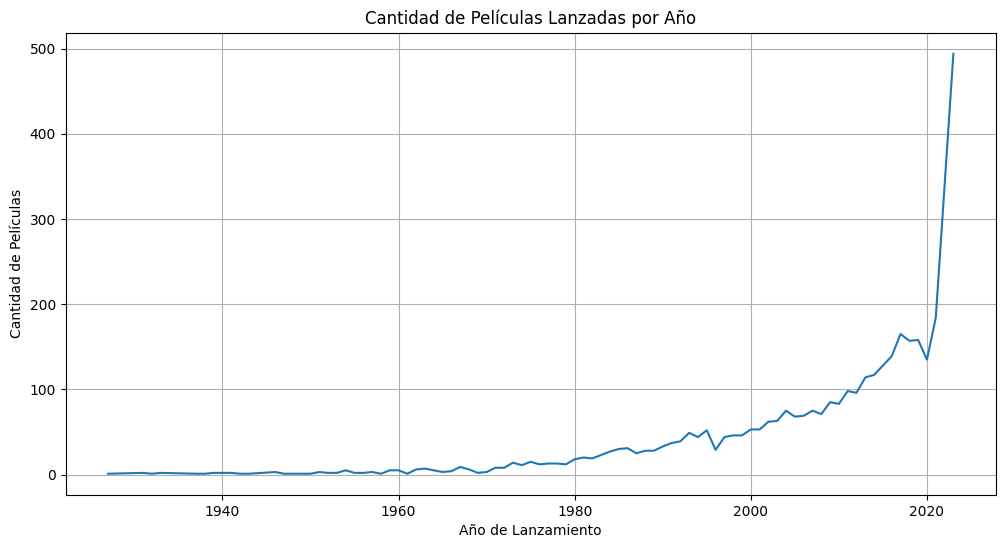

In [20]:
# Agrupamos el df por año de lanzamiento y ccontamos las películas por año
films_by_year = films.groupby('release_year')['film_id'].count()

# Creamos un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(films_by_year.index, films_by_year.values, linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas Lanzadas por Año')

# Mostrar el gráfico
plt.grid(True)
plt.show()

- #### Principales idiomas originales

In [58]:
principal_languages = films.groupby('original_language')['film_id'].count().sort_values(ascending=False)[:7]
principal_languages

original_language
en    3116
ja     220
ko     137
es      88
fr      78
it      62
zh      56
Name: film_id, dtype: int64

In [68]:
# Diccionario de mapeo de idiomas
mapeo = {'en': 'Inglés', 'ja': 'Japonés', 'ko': 'Koreano', 'es': 'Español', 
         'fr': 'Francés', 'it': 'Italiano', 'zh': 'Chinno'}

principal_languages.index = principal_languages.index.map(mapeo)

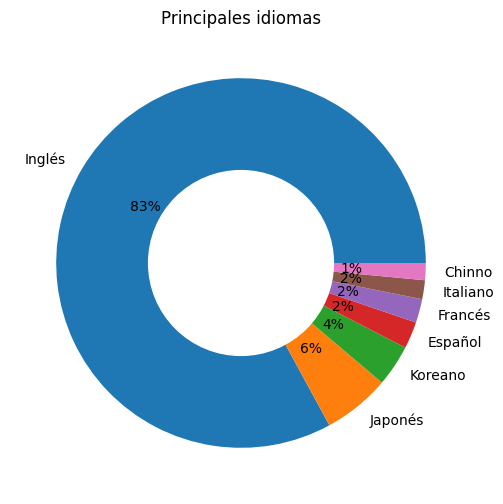

In [73]:
labels = principal_languages.index
data = principal_languages.values

# Create a pieplot
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels,  autopct='%.0f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Título del gráfico
plt.title('Principales idiomas')


plt.show()

- #### Película más popular y películas con mejor valoración

In [88]:
films_sorted_by_popularity = films.sort_values(by='popularity', ascending=False)
films_sorted_by_popularity.head(1)

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
0,565770,Blue Beetle,en,28,2023-08-16,2973,7.2,956,28,Action,2023,August


In [91]:
films[films['vote_average'] == 10]

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
2769,1175107,My Otaku Girlfriend,es,18,2023-09-28,64,10.0,1,18,Drama,2023,September
2807,1032194,The Blind,en,18,2023-09-28,48,10.0,3,18,Drama,2023,September
2851,1105832,Simón,en,18,2023-04-15,40,10.0,1,18,Drama,2023,April
2890,731159,Female Boss Hooker,ko,18,2020-08-31,49,10.0,1,18,Drama,2020,August
3053,1118256,Keramat Tunggak,id,18,2023-04-21,24,10.0,1,18,Drama,2023,April
3187,1135727,Sugapa,tl,18,2023-08-25,26,10.0,1,18,Drama,2023,August
3900,1173464,Fanny Ardant - Naissance d'une passion,fr,99,2023-09-27,20,10.0,1,99,Documentary,2023,September


- #### ¿Una mayor popularidad implica una mejor valoración? 

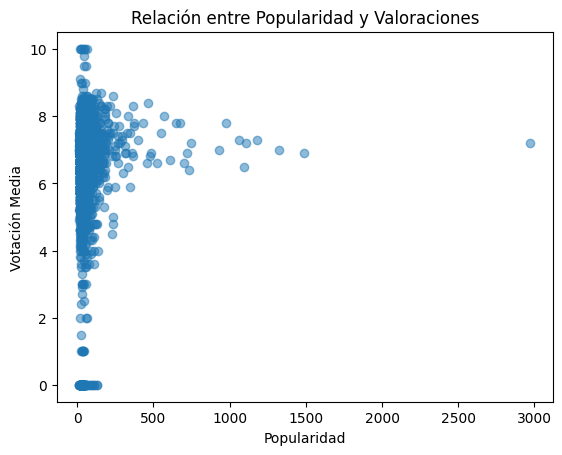

In [94]:
# Crear el gráfico de dispersión
plt.scatter(films['popularity'], films['vote_average'], alpha=0.5)  # alpha ajusta la transparencia de los puntos

# Etiquetas de los ejes y título
plt.xlabel('Popularidad')
plt.ylabel('Votación Media')
plt.title('Relación entre Popularidad y Valoraciones')

# Mostrar el gráfico
plt.show()

- #### Valoraciones y popularidad de las películas en función de sus géneros

## `Series`